In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_stata( r"../_data/dime.dta")

In [3]:
# We know that our ID is not unique
df.ID_05.is_unique

False

In [4]:
# Drop all duplicates
df2 = df.drop_duplicates().copy()

In [5]:
# We see these duplicates are different in a lot of variables
print(df2[df2.ID_05.duplicated( keep = False )])

     ID_05      ID_06         ID_10 ID_10_CONFIRM ID_10_CORRECTED  INC_01  \
314   3730    Mubumwe  Rwamagana-35           Yes             NaN       0   
829   3730  Nyakabuye  Rwamagana-35           Yes             NaN   80000   

     INC_02  INC_03  INC_04  INC_06  ...  CRP08QA_C1_P1  CRP08QA_C1_P2  \
314       0       0       0       0  ...           80.0            NaN   
829       0       0       0   50000  ...           50.0           80.0   

     CRP08UA_C1_P1 CRP08UA_C1_P2 CRP09QA_C1_P1  CRP09QA_C1_P2  CRP09UA_C1_P1  \
314             kg           NaN           0.0            NaN            NaN   
829             kg            kg           0.0           50.0            NaN   

     CRP09UA_C1_P2  CRP10A_C1_P1 CRP10A_C1_P2  
314            NaN           NaN          NaN  
829             kg           NaN      10000.0  

[2 rows x 35 columns]


In [6]:
# Change ID for some rows
df2.loc[314, 'ID_05'] = 3730 * 2

In [7]:
# Now we do not have problems
df2[df2.ID_05.duplicated( keep = False )]


,ID_05,ID_06,ID_10,ID_10_CONFIRM,ID_10_CORRECTED,INC_01,INC_02,INC_03,INC_04,INC_06,...,CRP08QA_C1_P1,CRP08QA_C1_P2,CRP08UA_C1_P1,CRP08UA_C1_P2,CRP09QA_C1_P1,CRP09QA_C1_P2,CRP09UA_C1_P1,CRP09UA_C1_P2,CRP10A_C1_P1,CRP10A_C1_P2


In [8]:
df2.ID_05.is_unique

True

Table 1 - Income: descriptive statistics (DS) table showing each income source and total income.

In [9]:
inc_cols = df2.filter(regex=("INC_*")).columns

for col in inc_cols:
    df2[f'{col}'] = df2[f'{col}'].replace( -88, np.nan )
    df2[f'{col}'] = df2[f'{col}'].replace( -66, np.nan )

In [10]:
# Sum all income sources
df2['INC_total'] = df2.filter(regex=("INC_*")).sum(axis = 1, skipna = False )

In [11]:
table1 = df2.filter(regex=("INC_*")).describe().transpose().round(2)
table1

,count,mean,std,min,25%,50%,75%,max
INC_01,994.0,50415.91,161461.57,0.0,0.0,0.0,41500.0,3080000.0
INC_02,995.0,57065.29,395754.68,0.0,0.0,0.0,25000.0,11200000.0
INC_03,996.0,2277.27,20367.26,0.0,0.0,0.0,0.0,500000.0
INC_04,996.0,26644.59,250147.73,0.0,0.0,0.0,0.0,6000000.0
INC_06,996.0,4777.01,30940.29,0.0,0.0,0.0,0.0,600000.0
INC_10,997.0,389.17,9832.38,0.0,0.0,0.0,0.0,300000.0
INC_11,992.0,65858.86,398896.39,0.0,0.0,5000.0,50000.0,11200000.0
INC_12,995.0,47717.10,90796.39,0.0,0.0,0.0,60000.0,1053000.0
INC_total,988.0,255208.45,676545.61,0.0,40000.0,120000.0,253150.0,11284000.0


Table 2 - Agricultural production: For the three most commonly cultivated crops, display descriptive statistics for total quantity harvested, total quantity sold, and sales value

In [12]:
# from categorical to string
df2['CRP08UA_C1_P1'] = df2['CRP08UA_C1_P1'].astype( str )
df2['CRP08UA_C1_P2'] = df2['CRP08UA_C1_P2'].astype( str )
df2['CRP09UA_C1_P1'] = df2['CRP09UA_C1_P1'].astype( str )
df2['CRP09UA_C1_P2'] = df2['CRP09UA_C1_P2'].astype( str )

# replace nana string
df2['CRP08UA_C1_P1'] = df2.CRP08UA_C1_P1.replace( "nan", "no info").copy()
df2['CRP08UA_C1_P2'] = df2.CRP08UA_C1_P2.replace( "nan", "no info").copy()
df2['CRP09UA_C1_P1'] = df2['CRP09UA_C1_P1'].replace( "nan", "no info").copy()
df2['CRP09UA_C1_P2'] = df2['CRP09UA_C1_P2'].replace( "nan", "no info").copy()

# get unique values
units_P1 = df2.CRP08UA_C1_P1.unique().tolist()
units_P2 = df2.CRP08UA_C1_P2.unique().tolist()
units_P3 = df2.CRP09UA_C1_P1.unique().tolist()
units_P4 = df2.CRP09UA_C1_P2.unique().tolist()

# Get unique units of measure
unique_unit = list(set(units_P1).union(set(units_P2)).union( set(units_P3) ).union(  set(units_P4) )  )
print(unique_unit)

# Generate unique metrics Kg
replace_vals = [1.5,  1000, 10, 25, 100, np.nan,  5, 1, 50, 2.5, 2.5, 15]

# replace string with values
df2['cultivated_unit_P1'] = df2['CRP08UA_C1_P1'].copy()
df2['cultivated_unit_P2'] = df2['CRP08UA_C1_P2'].copy()
df2['sold_unit_P1'] = df2['CRP09UA_C1_P1'].copy()
df2['sold_unit_P2'] = df2['CRP09UA_C1_P2'].copy()
for str_unit, val_unit in zip( unique_unit, replace_vals ):
    df2['cultivated_unit_P1'] = df2['cultivated_unit_P1'].replace(str_unit, val_unit )
    df2['cultivated_unit_P2'] = df2['cultivated_unit_P2'].replace(str_unit, val_unit )
    df2['sold_unit_P1'] = df2['sold_unit_P1'].replace(str_unit, val_unit )
    df2['sold_unit_P2'] = df2['sold_unit_P2'].replace(str_unit, val_unit )

['tons', 'kg', '50 Kg sack', '25 Kg sack', 'Mironko (1.5 kg)', 'no info', 'Bucket (5 kg): Imbegeti (5kg)', '15 kg basket: 15 kg Agatebo', '10 kg basket: 10 kg Agatebo', '100 Kg sack', 'Bucket (2.5kg): Imbegeti (2.5kg)']


/var/folders/r4/lwrzx5hs7d3cxk4p5zsy7zqh0000gp/T/ipykernel_38289/4275847277.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['cultivated_unit_P2'] = df2['cultivated_unit_P2'].replace(str_unit, val_unit )
/var/folders/r4/lwrzx5hs7d3cxk4p5zsy7zqh0000gp/T/ipykernel_38289/4275847277.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['sold_unit_P2'] = df2['sold_unit_P2'].replace(str_unit, val_unit )
/var/folders/r4/lwrzx5hs7d3cxk4p5zsy7zqh0000gp/T/ipykernel_38289/4275847277.py:32: FutureWarning: Downcasting behavior in `r

In [13]:
# Change Nulls with zeros when hh do not cultivate
for val in range(1,3):
    filter1 = df2[f'plant_crop_plot{val}'] == 0
    df2.loc[ filter1 , f'CRP10A_C1_P{val}'] = 0
    df2.loc[ filter1 , f'CRP08QA_C1_P{val}'] = 0
    df2.loc[ filter1 , f'CRP09QA_C1_P{val}'] = 0
    df2.loc[ filter1 , f'cultivated_unit_P{val}'] = 0
    df2.loc[ filter1 , f'sold_unit_P{val}'] = 0

In [14]:
# Cultivated Kg
df2['cultivated_kg_P1'] = df2['CRP08QA_C1_P1'] * df2['cultivated_unit_P1']
df2['cultivated_kg_P2'] = df2['CRP08QA_C1_P2'] * df2['cultivated_unit_P2']
df2['total_cultivated_kg'] = df2['cultivated_kg_P1']  + df2['cultivated_kg_P2']

# No sales, no money
filter1 = df2.CRP09QA_C1_P1 ==0
df2.loc[filter1 , 'CRP10A_C1_P1'] = 0
df2.loc[filter1 , 'sold_unit_P1'] = 0

# No sales, no money
filter1 = df2.CRP09QA_C1_P2 ==0
df2.loc[filter1 , 'CRP10A_C1_P2'] = 0
df2.loc[filter1 , 'sold_unit_P2'] = 0

# Sold Kg
df2['sold_kg_P1'] = df2['CRP09QA_C1_P1'] * df2['sold_unit_P1']
df2['sold_kg_P2'] = df2['CRP09QA_C1_P2'] * df2['sold_unit_P2']
df2['total_sold_kg'] = df2['sold_kg_P1']  + df2['sold_kg_P2']



# Sales
df2['total_earnings_sell'] = df2.filter(regex=("CRP10A*")).sum(axis = 1,  skipna = False )

Most Commonly cultivated crops: We define this metrics as the number of households that cultivate this crop.

We want to count how many houswholds cultivate an specific crop

In [15]:
# N Households cultivate idcrop in Plot 1
df_aux_p1 = df2.groupby('A_CROP_C1_P1' , as_index = False).ID_05.count() \
                .rename(columns = {'A_CROP_C1_P1' : 'crop', 'ID_05' : 'N_Households_1'} )
# N Households cultivate idcrop in Plot 2
df_aux_p2 = df2.groupby('A_CROP_C1_P2' , as_index = False).ID_05.count() \
                .rename(columns = {'A_CROP_C1_P2' : 'crop', 'ID_05' : 'N_Households_2'} )

# Total households taking into account all crops
dft = df_aux_p1.merge(df_aux_p2, on = 'crop', how = 'outer')

# Get total
dft['Total_Households'] = dft.filter(regex=("N_*")).sum( axis = 1 )

# Drop values
df_crop_hh = dft.drop(['N_Households_2', 'N_Households_1'], axis = 1).copy()

# Get the three most cultivated crops
print(df_crop_hh.sort_values('Total_Households', ascending=False).head(3))

crop_top3 = df_crop_hh.sort_values('Total_Households', ascending=False).head(3).crop.tolist()

         crop  Total_Households
3   Dry Beans             895.0
10    Sorghum             195.0
8       Maize              80.0


/var/folders/r4/lwrzx5hs7d3cxk4p5zsy7zqh0000gp/T/ipykernel_38289/563246246.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aux_p1 = df2.groupby('A_CROP_C1_P1' , as_index = False).ID_05.count() \
/var/folders/r4/lwrzx5hs7d3cxk4p5zsy7zqh0000gp/T/ipykernel_38289/563246246.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aux_p2 = df2.groupby('A_CROP_C1_P2' , as_index = False).ID_05.count() \


In [16]:
df2_P1 = df2[['ID_05', 'A_CROP_C1_P1','cultivated_kg_P1', 'sold_kg_P1', 'CRP10A_C1_P1']].copy()
df2_P1.columns = ['id', 'crop', 'cultivated_kg', 'sold_kg', 'sold_value' ]
df2_P1['p'] = 1

In [17]:
df2_P2 = df2[['ID_05', 'A_CROP_C1_P2','cultivated_kg_P2', 'sold_kg_P2', 'CRP10A_C1_P2']].copy()
df2_P2.columns = ['id', 'crop', 'cultivated_kg', 'sold_kg', 'sold_value' ]
df2_P2['p'] = 2

In [18]:
df_tb2 = pd.concat([df2_P1, df2_P2], axis = 0 )

In [19]:
filter_crop = df_tb2.crop.isin( crop_top3 )

In [20]:
df_tb2[filter_crop].drop(['p', 'id'], axis =1 ) \
        .groupby(['crop']).describe().stack().round(2)
    

/var/folders/r4/lwrzx5hs7d3cxk4p5zsy7zqh0000gp/T/ipykernel_38289/169632344.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .groupby(['crop']).describe().stack().round(2)


cultivated_kg     sold_kg  sold_value
crop                                                  
Dry Beans count   8.510000e+02      851.00      851.00
          mean    1.408519e+06    14838.33     5330.69
          std     3.088086e+07    46490.00    16707.13
          min    -8.880000e+05        0.00        0.00
          25%     1.500000e+04        0.00        0.00
          50%     4.000000e+04        0.00        0.00
          75%     8.000000e+04        0.00        0.00
          max     8.550000e+08   600000.00   185000.00
Maize     count   7.200000e+01       72.00       72.00
          mean    1.226048e+05    63722.65    19092.36
          std     2.411484e+05   111044.25    38103.11
          min    -8.880000e+05        0.00        0.00
          25%     1.000000e+04        0.00        0.00
          50%     7.750000e+04     4000.00     6750.00
          75%     1.500000e+05    85000.00    20000.00
          max     1.100000e+06   600000.00   200000.00
Sorghum   count   1.790000e+02      179.00      179.00
          mean    1.611759e+07   155693.26    31498.27
          std     1.618811e+08   440286.85    62967.23
          min    -8.880000e+05        0.00        0.00
          25%     5.000000e+04        0.75       25.50
          50%     1.250000e+05    60000.00    15000.00
          75%     3.000000e+05   200000.00    40000.00
          max     1.995000e+09  5540000.00   700000.00

A graph representing the data on flour consumption (the exact nature of the graph is at your discretion).

In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Consumption of floor in Households')

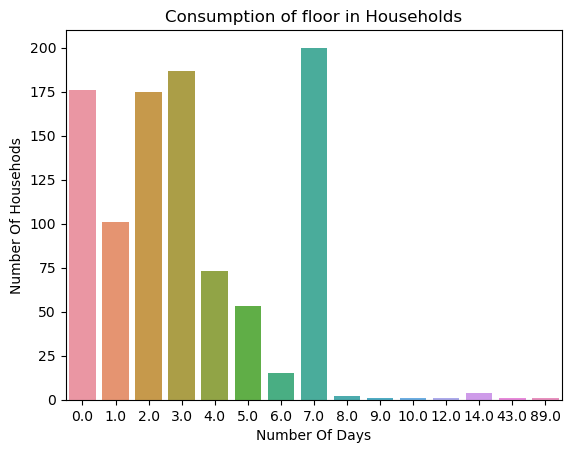

In [23]:
sns.countplot(x=df["EXP_25_1"])
plt.xlabel( 'Number Of Days')
plt.ylabel( 'Number Of Househods')
plt.title( 'Consumption of floor in Households')